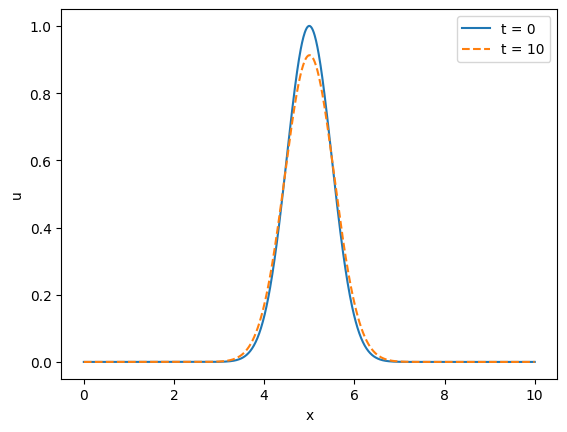

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def init_cond(L, H):
    M = int(L / H)
    u = np.zeros(M + 1)
    for m in range(M + 1):
        u[m] = np.exp(-(m * H - L/2)**2 / 0.5)
    return u

def upwind_scheme(L, H, T, TAU):
    M = int(L / H)
    N = int(T / TAU)
    u = np.zeros((N, M + 1))
    u[0, :] = init_cond(L, H)
    for n in range(N - 1):
        for m in range(M + 1):
            if m == M:
                u[n + 1, m] = u[n, 0] + Co * (u[n, 1] - u[n, 0])
            else:
                u[n + 1, m] = u[n, m] + Co * (u[n, m + 1] - u[n, m])
    return u

Co = 0.5
L = 10
T = 10
H = 0.01
TAU = Co * H

u = upwind_scheme(L, H, T, TAU)

M = int(L / H)
N = int(T / TAU)
plt.plot(np.linspace(0, L, M + 1), u[0, :], label = 't = {}'.format(0))
plt.plot(np.linspace(0, L, M + 1), u[N - 1, :], label = 't = {}'.format(T), linestyle = '--')

plt.legend()
plt.xlabel('x')
plt.ylabel('u')
plt.show()

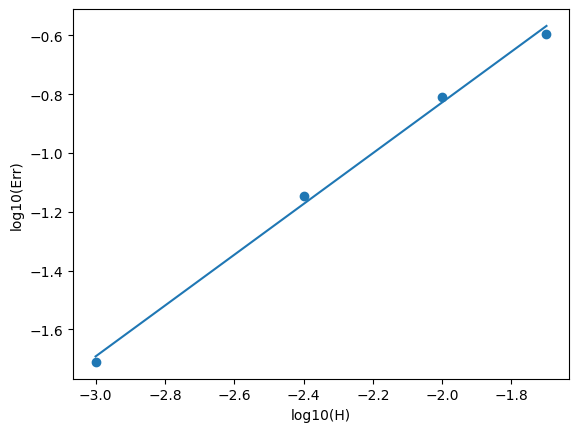

In [30]:
K = 4
TAU_arr = np.array([0.02, 0.01, 0.004, 0.001]) 
error_arr = np.zeros(K)

def aver(data):
  return np.sum(data) / np.size(data)
def MNK(x, y):
  k = (aver(x * y) - aver(x) * aver(y)) / (aver(x**2) - aver(x)**2)
  b = aver(y) - k * aver(x)
  return k, b

Co = 0.5
L = 10
T = 10

def exact_sol(x):
    return np.exp(-(x - L/2)**2 / 0.5)

for i in range(K):
    TAU = TAU_arr[i]
    H = TAU / Co
    M = int(L / H)
    N = int(T / TAU)
    x_grid = np.linspace(0, L, M + 1)
    U_num = upwind_scheme(L, H, T, TAU)
    U_exact = exact_sol(x_grid)
    error_arr[i] = np.max(np.abs(U_exact - U_num[N - 1]))
    
k_1, b_1 = MNK(np.log10(TAU_arr), np.log10(error_arr))
plt.plot(np.log10(TAU_arr), k_1 * np.log10(TAU_arr) + b_1)
plt.scatter(np.log10(TAU_arr), np.log10(error_arr))
plt.xlabel('log10(H)')
plt.ylabel('log10(Err)')
plt.show()

In [31]:
print(k_1)

0.8646198377133196


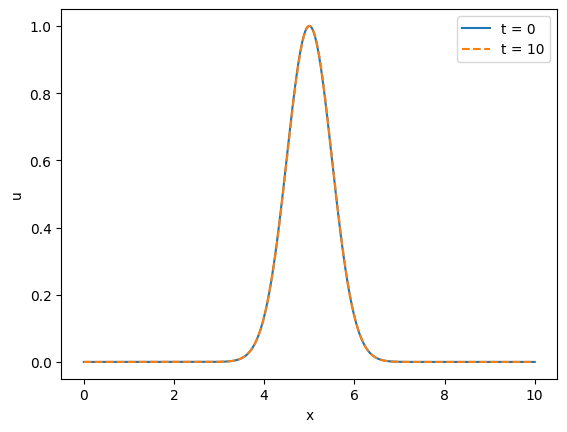

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def init_cond(L, H):
    M = int(L / H)
    u = np.zeros(M + 1)
    for m in range(M + 1):
        u[m] = np.exp(-(m * H - L/2)**2 / 0.5)
    return u

def Lax_Vend_scheme(L, H, T, TAU):
    M = int(L / H)
    N = int(T / TAU)
    u = np.zeros((N, M + 1))
    u[0, :] = init_cond(L, H)
    for n in range(N - 1):
        for m in range(M + 1):
            if m == M or m == 0:
                u[n + 1, m] = 0.5 * Co * (Co + 1) * u[n, 1] + 0.5 * Co * (Co - 1) * u[n, M - 1] + (1 - Co**2) *  u[n, 0]
            else:
                u[n + 1, m] = 0.5 * Co * (Co + 1) * u[n, m + 1] + 0.5 * Co * (Co - 1) * u[n, m - 1] + (1 - Co**2) *  u[n, m]

    return u

Co = 0.5
L = 10
T = 10
H = 0.01
TAU = Co * H

u = Lax_Vend_scheme(L, H, T, TAU)

M = int(L / H)
N = int(T / TAU)
plt.plot(np.linspace(0, L, M + 1), u[0, :], label = 't = {}'.format(0))
plt.plot(np.linspace(0, L, M + 1), u[N - 1, :], label = 't = {}'.format(T), linestyle = '--')

plt.legend()
plt.xlabel('x')
plt.ylabel('u')
plt.show()

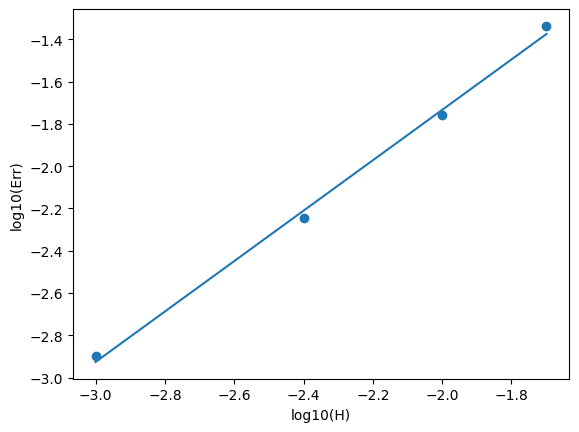

In [35]:
K = 4
TAU_arr = np.array([0.02, 0.01, 0.004, 0.001]) 
error_arr = np.zeros(K)

def aver(data):
  return np.sum(data) / np.size(data)
def MNK(x, y):
  k = (aver(x * y) - aver(x) * aver(y)) / (aver(x**2) - aver(x)**2)
  b = aver(y) - k * aver(x)
  return k, b

Co = 0.5
L = 10
T = 10

def exact_sol(x):
    return np.exp(-(x - L/2)**2 / 0.5)

for i in range(K):
    TAU = TAU_arr[i]
    H = TAU / Co
    M = int(L / H)
    N = int(T / TAU)
    x_grid = np.linspace(0, L, M + 1)
    U_num = Lax_Vend_scheme(L, H, T, TAU)
    U_exact = exact_sol(x_grid)
    error_arr[i] = np.max(np.abs(U_exact - U_num[N - 1]))
    
k_1, b_1 = MNK(np.log10(TAU_arr), np.log10(error_arr))
plt.plot(np.log10(TAU_arr), k_1 * np.log10(TAU_arr) + b_1)
plt.scatter(np.log10(TAU_arr), np.log10(error_arr))
plt.xlabel('log10(H)')
plt.ylabel('log10(Err)')
plt.show()

In [36]:
print(k_1)

1.1922970467491214
